In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import re

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Assessement

In [ ]:
EMO_df = pd.read_csv("/content/electric_bike_ratings_2212.csv")
EMO_df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [ ]:
EMO_df.duplicated().sum()

0

In [ ]:
EMO_df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [ ]:
print(EMO_df.shape), print(EMO_df.info())

(1500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
None


(None, None)

In [ ]:
print("make_model: " + "\n" + str(EMO_df.make_model.unique()))
print("\n" + "review_month: " + "\n" + str(EMO_df.review_month.unique()))

make_model: 
['Nielah-Eyden' 'Nielah-Keetra' 'Lunna-Keetra' 'Hoang-Keetra'
 'Lunna-Eyden' 'Hoang-Eyden']

review_month: 
['Oct' 'Jun' '23-Oct' '07-Nov' '16-Sep' '26-Aug' '01-Mar' '15-Mar'
 '09-Mar' 'Jul' '10-Nov' 'Mar' 'Apr' 'Sep' '27-Dec' '11-Nov' '07-Dec'
 'Feb' 'Jan' '06-Jun' '12-Jul' '02-Aug' '23-Feb' '27-Jul' '26-Nov'
 '30-Apr' '31-Jul' '22-Nov' '05-Sep' '05-Dec' '21-Jul' '15-Nov' '07-Jun'
 '20-May' '23-Sep' '10-Sep' '19-Oct' '28-Oct' '08-Apr' '14-Feb' '28-Nov'
 '28-Feb' '28-Jul' '12-Apr' '25-Apr' '25-Oct' '08-Jul' '29-Mar' '22-Sep'
 '26-Jun' '24-May' '12-Mar' '15-Feb' '28-Aug' 'May' '16-Jun' '02-Jul'
 '06-Feb' '21-Jun' 'Nov' '21-Apr' '19-Jul' '31-May' '11-Aug' '14-Mar'
 '12-Dec' '02-Apr' '23-Aug' '11-Feb' '24-Aug' '03-Jun' '01-Apr' '24-Nov'
 'Dec' '26-Mar' '22-Oct' '22-Jan' '17-Mar' '05-Oct' '20-Mar' '13-Jul'
 '03-Oct' '16-Nov' '10-Apr' '12-Aug' '19-Aug' '09-Oct' 'Aug' '05-Nov'
 '23-Dec' '06-Jul' '03-Feb' '21-May' '03-Jul' '10-May' '12-Jun' '20-Oct'
 '17-Sep' '24-Feb' '24-Sep' '1

In [ ]:
print("web browser: " + "\n" + str(EMO_df.web_browser.unique()))
print("\n" + "reviewer_age: " + "\n" + str(EMO_df.reviewer_age.unique()))
print("\n" + "primary_use: " + "\n" + str(EMO_df.primary_use.unique()))
print("\n" + "value_for_money: " + "\n" + str(EMO_df.value_for_money.unique()))

web browser: 
['Chrome' nan 'IE' 'Firefox' 'Safari' 'Android' 'Opera']

reviewer_age: 
['23' '24' '28' '41' '33' '47' '20' '32' '35' '22' '29' '39' '42' '36'
 '40' '27' '48' '34' '16' '21' '25' '30' '-' '46' '37' '31' '17' '44' '26'
 '38' '49' '50' '45' '19' '43' '18']

primary_use: 
['Commuting' 'Leisure']

value_for_money: 
['5/10' '4/10' '3/10' '7/10' '6/10' '2/10' '9/10' '8/10' '10/10' '1/10']


#### Data issues:
- review_month: contains entries like 'Oct' and '26-Oct' which are not adequate.
- web browser: contains 150 null values.
- value_for_money: they need to be discrete and not nominal.
- reviewer_age: needs to be integer, and clean from null values.

### Data cleaning
First let's clean months column.

In [ ]:

months = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

In [ ]:
EMO_df["review_month"] = EMO_df["review_month"].replace(to_replace=r"\d\d-", value="", regex=True)

In [ ]:
EMO_df['review_month'] = EMO_df['review_month'].replace(months)

Now we'll clean web_browser and reviewer_age columns

In [ ]:
EMO_df['web_browser'] = EMO_df['web_browser'].replace(np.nan, "Unknown")

In [ ]:
EMO_df['reviewer_age'] = EMO_df['reviewer_age'].replace("-", np.nan)

Finally we'll clean the value_for_money column




In [ ]:
EMO_df["value_for_money"] = [int(x.split('/')[0]) for x in EMO_df["value_for_money"]]

Time to deal with null values

In [ ]:
EMO_df['reviewer_age'] = EMO_df['reviewer_age'].astype(str)

In [ ]:
EMO_df['reviewer_age'].median()

33.0

In [ ]:
EMO_df['reviewer_age'].fillna(EMO_df['reviewer_age'].median(), inplace=True)

In [ ]:
EMO_df['reviewer_age'] = EMO_df['reviewer_age'].replace('nan', "33")

In [ ]:
EMO_df['reviewer_age'] = EMO_df['reviewer_age'].astype(int)

Let's check

In [ ]:
EMO_df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,October,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,June,Unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,October,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,November,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,September,Chrome,33,Leisure,5,12.29


In [ ]:
EMO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


- review_month: replaced the short format with the longer format with removing numbers.
- web_browser: replaced the null values with unknown.
- reviewer_age: replaced "-" with null values, then filled the nan values into the median, then changed the type to integers.
- value_for_money: changed to integer type, and removed /10.

1. (a, b, c)

Owned: Object (nominal), adequate with table, no null values.

Make_model: Object (nominal), adequate with table, no null values.

review_month: Object (nominal), removed numbers and replaced format e.i: Jan to January, no null values.

web_browser: Object (nominal), replaced null values with "Unknown".

reviewer_age: Changed to "int" type (discrete), and replaced null values with the median.

primary_use: Object (nominal), adequate with table, no null values.

value_for_money: Changed to integer type (discrete), no null values.

overall_rating: float (continuous), adequate with table, no null values.

### EDA

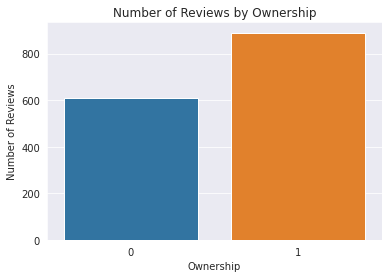

In [ ]:
sns.set_style("darkgrid")

# the number of reviews by owners and non-owners
owned_counts = EMO_df['owned'].value_counts()

# Bar chart
sns.countplot(x='owned', data=EMO_df)
plt.xlabel('Ownership')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Ownership')
plt.show()

2.a. The category "owners" (1) has the most reviews (more than 800). 

2.b. However the non-owners category (0) has about 600 reviews which is important and gives us a good balance in our dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


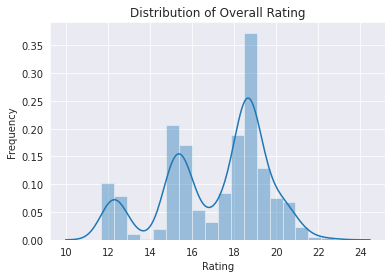

In [ ]:
sns.distplot(EMO_df["overall_rating"], hist=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Rating")
plt.show()

3. The rates (15, 16, and 18 to 20) are the most frequent in our dataset, there are also 12 and 13, since the range of overall ratings is from 0 to 25, our distribution looks really good since we have good rates.

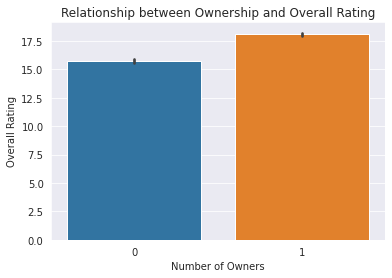

In [ ]:
sns.barplot(x='owned', y='overall_rating', data=EMO_df)
plt.title('Relationship between Ownership and Overall Rating')
plt.xlabel('Number of Owners')
plt.ylabel('Overall Rating')
plt.show()

*4*. As we can see the overall rating trends to be higher with the owners than non-owners with a short difference.

### Data processing
5. Since we have to predict a labeled data type, the problem that we deal with is "Classification" where we have to predict the output of owner or not owner.

In [ ]:
X = EMO_df.drop(columns=['owned', 'review_month', 'web_browser'])
y = EMO_df['owned']

In [ ]:
#creating instance of one-hot-encoder
onehot = OneHotEncoder(handle_unknown='ignore')
#onehot.fit(X[['make_model']])

#perform one-hot encoding
model_df = pd.DataFrame(onehot.fit_transform(X[['make_model']]).toarray(), columns=onehot.categories_[0])


#merge one-hot encoded columns back with original DataFrame
X = X.join(model_df)

#view final df
X.head()

,make_model,reviewer_age,primary_use,value_for_money,overall_rating,Hoang-Eyden,Hoang-Keetra,Lunna-Eyden,Lunna-Keetra,Nielah-Eyden,Nielah-Keetra
0,Nielah-Eyden,23,Commuting,5,18.62,0.0,0.0,0.0,0.0,1.0,0.0
1,Nielah-Keetra,24,Commuting,4,15.55,0.0,0.0,0.0,0.0,0.0,1.0
2,Lunna-Keetra,28,Commuting,5,12.76,0.0,0.0,0.0,1.0,0.0,0.0
3,Hoang-Keetra,41,Leisure,5,17.07,0.0,1.0,0.0,0.0,0.0,0.0
4,Lunna-Keetra,33,Leisure,5,12.29,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#creating instance of one-hot-encoder
onehot = OneHotEncoder(handle_unknown='ignore')
#onehot.fit(X[['make_model']])

#perform one-hot encoding
use_df = pd.DataFrame(onehot.fit_transform(X[['primary_use']]).toarray(), columns=onehot.categories_[0])


#merge one-hot encoded columns back with original DataFrame
X = X.join(use_df)

#view final df
X.head()

,make_model,reviewer_age,primary_use,value_for_money,overall_rating,Hoang-Eyden,Hoang-Keetra,Lunna-Eyden,Lunna-Keetra,Nielah-Eyden,Nielah-Keetra,Commuting,Leisure
0,Nielah-Eyden,23,Commuting,5,18.62,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Nielah-Keetra,24,Commuting,4,15.55,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Lunna-Keetra,28,Commuting,5,12.76,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Hoang-Keetra,41,Leisure,5,17.07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Lunna-Keetra,33,Leisure,5,12.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X = X.drop(columns=['make_model', 'primary_use'])

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic Regression
6. This is our baseline model, logistic regression is widely used in classification problems and has a good performance, first we'll define our model and fit it on the data then we'll evaluate it.

In [ ]:
# Build a logistic regression model
log_reg = LogisticRegression(C=0.1, penalty='l2')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Evaluate model using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7511111111111111


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.56      0.64       177
           1       0.76      0.87      0.81       273

    accuracy                           0.75       450
   macro avg       0.75      0.72      0.73       450
weighted avg       0.75      0.75      0.74       450



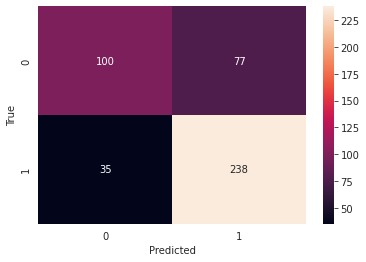

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Random Forest Classification 
7. As a comparison model we'll use random forest regression, this model is largely adapted for classification and regression problems, we'll use it for our problem.

In [ ]:
# Instantiate RandomForestclassifier
rf_clf = RandomForestClassifier()

# Train the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7511111111111111


In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.67       177
           1       0.78      0.83      0.80       273

    accuracy                           0.75       450
   macro avg       0.74      0.73      0.73       450
weighted avg       0.75      0.75      0.75       450



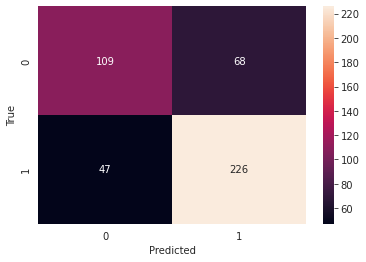

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

8. The purpose of choosing these models is based on my previous experiences, both of them can perform in a performant way based on the data, as we see their performance is good in this problem, since the goal is to improve accuracy there are severe ways to achieve that, for example tuning hyperparameters, use other models, normalize the data and feed the model with more data...

09.

We used evaluation metrics from sickit learn library, the accuracy of our model is 0.75, which is good and it can be improved. 

We used the same evaluation metrics for random forest clf from sickit learn library as before, we see that the accuracy of our model is 0.75, which is the same as the logistic regression model.



10.

Both of the models are performing the same way, there is no such difference in the evaluation parts for each model, turning hyperparameters, and feeding more data to the models can make difference.